# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


## Data and Setup

____
** Importing numpy and pandas **

In [28]:
import numpy as np 
import pandas as pd

** Importing visualization libraries and set %matplotlib inline. **

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

** Reading in the csv file as a dataframe called df **

In [30]:
df = pd.read_csv("911.csv")

** Checking the info() of the df **

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Checking the head of df **

In [32]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


** Top 5 zipcodes for 911 calls? **

In [33]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** Top 5 townships (twp) for 911 calls? **

In [34]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Looking at the 'title' column, how many unique title codes are there? **

In [35]:
len(df['title'].unique())

110

## Creating new features

** Using .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

In [36]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

** Most common Reason for a 911 call based off of this new column **

In [37]:
df['Reason'].value_counts().head(3)

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Now using seaborn to create a countplot of 911 calls by Reason. **

<AxesSubplot:xlabel='Reason', ylabel='count'>

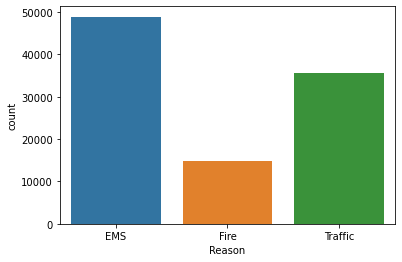

In [38]:
sns.countplot(x ='Reason',data=df)

___
** Finding out data type of the objects in the timeStamp column **

In [39]:
type(df['timeStamp'].iloc[0])

str

** Converting the column from strings to DateTime objects. **

In [40]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

** Using .apply() to create 3 new columns called Hour, Month, and Day of Week.**

In [41]:
df['Day_Of_Week'] = df['timeStamp'].apply(lambda x: x.weekday())
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day_Of_Week,Month,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,3,12,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,3,12,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,3,12,17
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,3,12,17
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,3,12,17


** Using the .map() with this dictionary to map the actual string names to the day of the week: **


In [42]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [43]:
df['Day_Of_Week'].map(dmap)

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Day_Of_Week, Length: 99492, dtype: object

** Now using seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

<AxesSubplot:xlabel='Day_Of_Week', ylabel='count'>

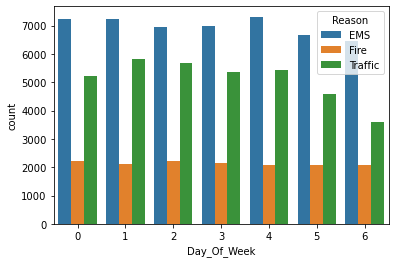

In [44]:
sns.countplot(x='Day_Of_Week',data=df,hue='Reason')

**Now doing the same for Month:**

<AxesSubplot:xlabel='Month', ylabel='count'>

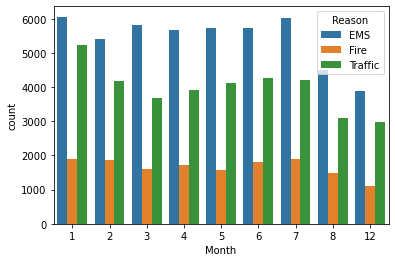

In [45]:
sns.countplot(x='Month',data=df,hue='Reason')


** We can notice it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now creating a gropuby object called byMonth, where you group the DataFrame by the month column and using the count() method for aggregation. **

In [46]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day_Of_Week,Hour
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Now creating a simple plot off of the dataframe indicating the count of calls per month. **

<AxesSubplot:xlabel='Month'>

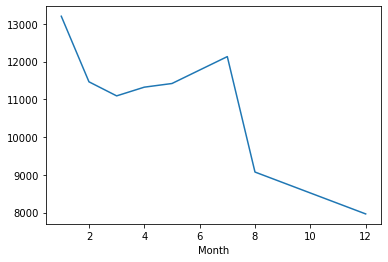

In [47]:
# Could be any column
byMonth['twp'].plot()

** Using seaborn's lmplot() to create a linear fit on the number of calls per month. **

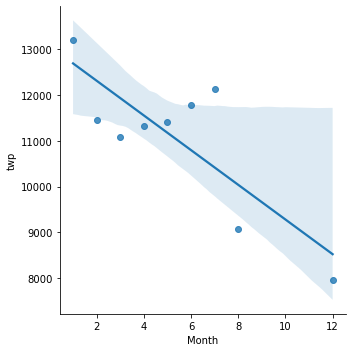

In [48]:
sns.lmplot(x='Month', y='twp', data =byMonth.reset_index())

**Creating a new column called 'Date' that contains the date from the timeStamp column.** 

In [49]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())
df.head(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day_Of_Week,Month,Hour,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,3,12,17,2015-12-10


** Now using groupby with Date column with the count() aggregate and creating a plot of counts of 911 calls.**

<AxesSubplot:xlabel='Date'>

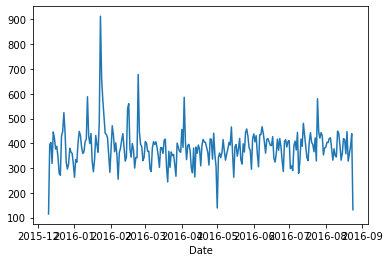

In [50]:
a = df.groupby('Date').count()
a.head()
a['twp'].plot()

** Now recreating this plot but with 3 separate plots with each plot representing a Reason for the 911 call**

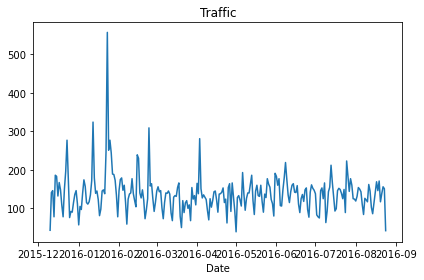

In [57]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

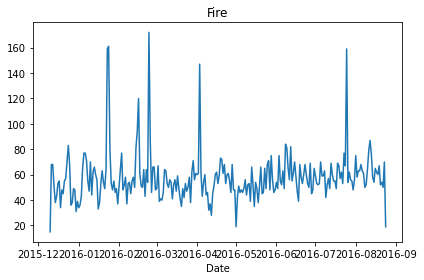

In [58]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

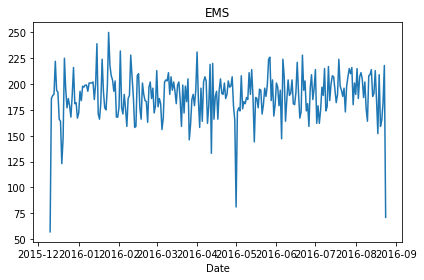

In [59]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.**

In [61]:
dayHour = df.groupby(by=['Day_Of_Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day_Of_Week,,,,,,,,,,,,,,,,,,,,,
0,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
1,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
2,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335
3,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
4,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474


** Now creating a HeatMap using this new DataFrame. **

<AxesSubplot:xlabel='Hour', ylabel='Day_Of_Week'>

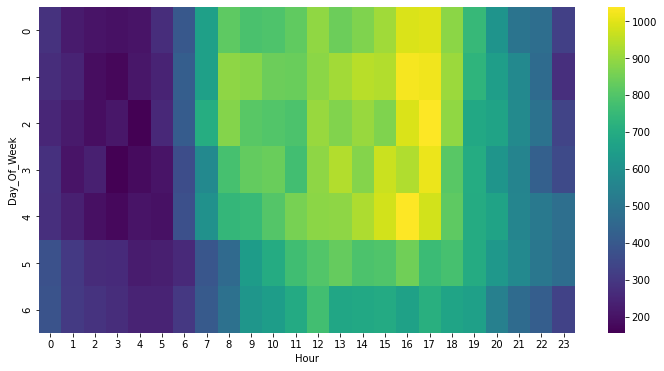

In [62]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

** Now creating a clustermap using this DataFrame. **

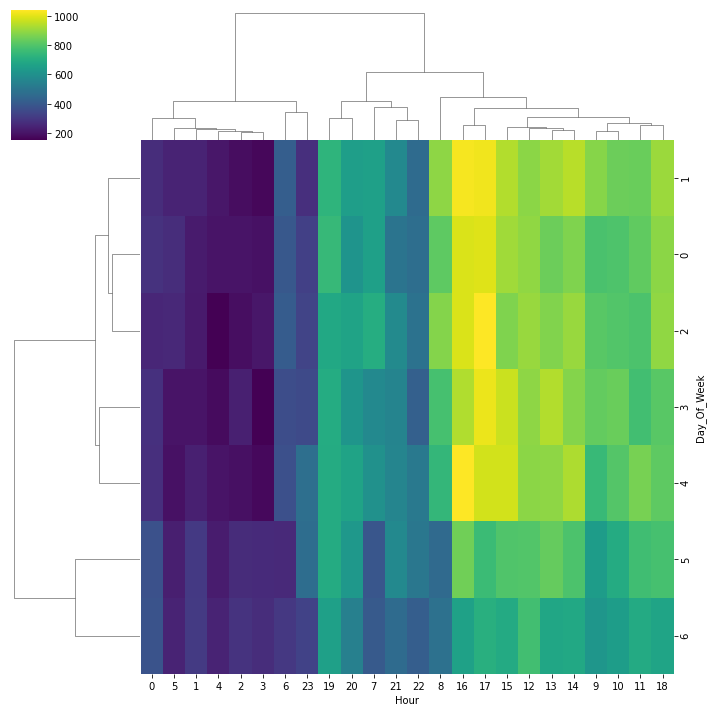

In [63]:
sns.clustermap(dayHour,cmap='viridis')

** Now repeating these same plots and operations, for a DataFrame that shows the Month as the column. **

In [66]:
dayMonth = df.groupby(by=['Day_Of_Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day_Of_Week,,,,,,,,,
0,1727,1964,1535,1598,1779,1617,1692,1511,1257
1,1973,1753,1884,1430,1918,1676,1670,1612,1234
2,1700,1903,1889,1517,1538,2058,1717,1295,1262
3,1584,1596,1900,1601,1590,2065,1646,1230,1266
4,1970,1581,1525,1958,1730,1649,2045,1310,1065


<AxesSubplot:xlabel='Month', ylabel='Day_Of_Week'>

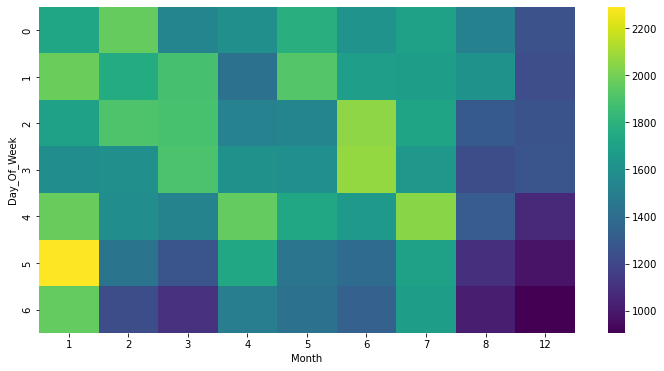

In [67]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

<Figure size 864x432 with 0 Axes>

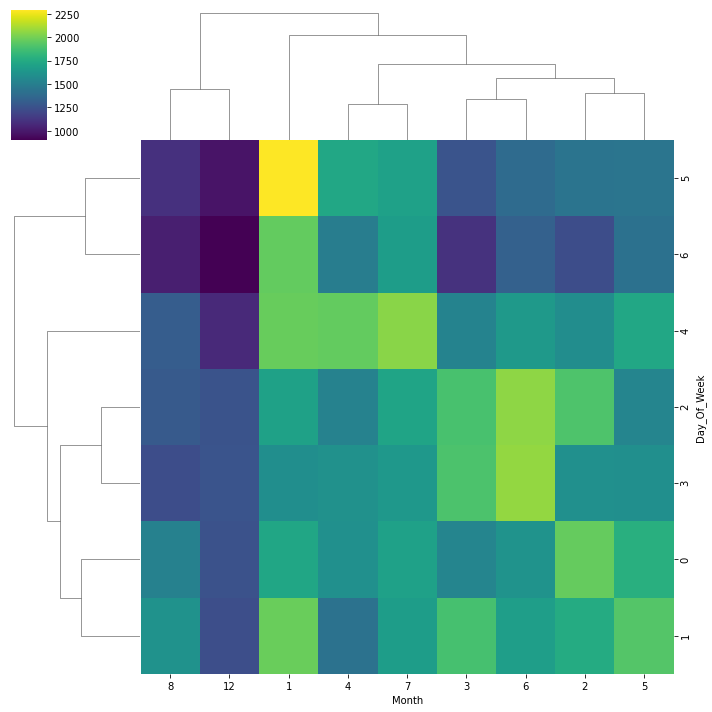

In [68]:
plt.figure(figsize=(12,6))
sns.clustermap(dayMonth,cmap='viridis')